In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
from pydub import AudioSegment
import matplotlib
from pydub.playback import play


In [4]:
audio = AudioSegment.from_wav('Sound_Files/All_C_1/6_7.wav')
audio

In [4]:
arr = [i for i in range(10)]
i = [i for i in range(5)]

In [5]:
arr[i]

TypeError: list indices must be integers or slices, not list

In [67]:
class Analyzer:

    def __init__(self, file_path,source='Sound_Files/All_C_1/'):
        self.audio = AudioSegment.from_wav(source+file_path)
        self.file_name = file_path
        self.SAMPLE_RATE, self.data = wav.read(source+file_path)
        self.DURATION = len(self.audio)/1000
        self.xf, self.stft_out = None, None

    def play_file(self):
        return self.audio

    def split_audio(self, k=1):
        s = np.round(len(self.audio)/k)
        return [self.audio[i*s:(i+1)*s] for i in range(k)]
        # return np.split(self.audio,k)

    def get_data(self):
        return self.data

    def split_data(self, k=1):
        return np.split(self.data,k)

    def filter(self, old_x,old_y, k=20):
        # Filter frequencies 0-5000
        l = -1
        r = -1
        for i in range(len(old_x)):
            if old_x[i] >= 0 and l == -1:
                l = i
            if old_x[i] > 5000 and r == -1:
                r = i
        x = old_x[l:r]
        y = old_y[l:r]
        # Filter above median
        med = np.median(y)
        out_x = []
        out_y = []
        for i in range(len(x)):
            if y[i] >= med:
                out_x.append(x[i])
                out_y.append(y[i])
        x = out_x
        y = out_y
        # Filter local maxima
        out_x = []
        out_y = []
        for i in range(1,len(x)-1):
            local_max = True
            for j in range(1,len(x)-1):
                if x[j] + k >= x[i] and x[j] - k <= x[i]:
                    if i != j and y[i] < y[j]:
                        local_max = False
            if local_max:
                out_x.append(x[i])
                out_y.append(y[i])
            print(i,len(x))
        return  np.array(out_x), np.array(out_y)

    def stft(self, k=1):
        arr = self.split_data(k)
        duration = self.DURATION / k
        # N = self.SAMPLE_RATE * self.DURATION
        N = int(self.SAMPLE_RATE * duration)
        self.xf = fftfreq(N, 1 / self.SAMPLE_RATE)
        return self.xf,np.array([fft(arr[i]) for i in range(k)])

    def filter_min(self, in_x,in_y,m):
        x = np.ravel(in_x)
        y = np.ravel(in_y)
        out_x = []
        out_y = []
        for i in range(len(x)):
            if y[i] > m:
                out_x.append(x[i])
                out_y.append(y[i])
        return np.array(out_x),np.array(out_y)

    def plot(self, l, r,save_path,k=1,lim=1,rows=1,my_top=0.9):
        cols = int(k/rows)
        fig, axs = plt.subplots(rows,cols,figsize=(20,3*rows))
        cur_data, cur_out = self.stft(k)
        fig.suptitle('File ' + self.file_name)
        fig.subplots_adjust(top=my_top)
        if lim > len(cur_out):
            lim = len(cur_out)
        cur_out = cur_out[:lim]
        for i in range(lim):
            x = int(i/cols)
            y = i%cols
            if k == 1:
                cur_ax = axs
            else:
                if rows == 1:
                    cur_ax = axs[y]
                else:
                    cur_ax = axs[x,y]
            cur_ax.title.set_text('Split ' + str(i+1))
            cur_ax.plot(cur_data,np.abs(cur_out[i]))

            cur_ax.set_ylim(0,2e7)
            cur_ax.set_xlim(l,r)
        if k==1:
            axs.set(xlabel='Frequencies', ylabel='Amplitudes')
        else:
            for ax in axs.flat:
                ax.set(xlabel='Frequencies', ylabel='Amplitudes')

            # Hide x labels and tick labels for top plots and y ticks for right plots.
            for ax in axs.flat:
                ax.label_outer()

        fig.subplots_adjust(hspace=.2)
        plt.savefig('STFT_Graphs/' + save_path)


        plt.show()


In [68]:
test = Analyzer('1_7.wav')
# Gets an stft of 10 splits
x, stft_arr = test.stft(10)

In [69]:
x_fft, fft_arr = test.stft(1)

In [70]:
a,b = test.filter(np.ravel(x_fft),np.ravel(fft_arr),20)

1 7501
2 7501
3 7501
4 7501
5 7501
6 7501
7 7501
8 7501
9 7501
10 7501
11 7501
12 7501
13 7501
14 7501
15 7501
16 7501
17 7501
18 7501
19 7501
20 7501
21 7501
22 7501
23 7501
24 7501
25 7501
26 7501
27 7501
28 7501
29 7501
30 7501
31 7501
32 7501
33 7501
34 7501
35 7501
36 7501
37 7501
38 7501
39 7501
40 7501
41 7501
42 7501
43 7501
44 7501
45 7501
46 7501
47 7501
48 7501
49 7501
50 7501
51 7501
52 7501
53 7501
54 7501
55 7501
56 7501
57 7501
58 7501
59 7501
60 7501
61 7501
62 7501
63 7501
64 7501
65 7501
66 7501
67 7501
68 7501
69 7501
70 7501
71 7501
72 7501
73 7501
74 7501
75 7501
76 7501
77 7501
78 7501
79 7501
80 7501
81 7501
82 7501
83 7501
84 7501
85 7501
86 7501
87 7501
88 7501
89 7501
90 7501
91 7501
92 7501
93 7501
94 7501
95 7501
96 7501
97 7501
98 7501
99 7501
100 7501
101 7501
102 7501
103 7501
104 7501
105 7501
106 7501
107 7501
108 7501
109 7501
110 7501
111 7501
112 7501
113 7501
114 7501
115 7501
116 7501
117 7501
118 7501
119 7501
120 7501
121 7501
122 7501
123 7501
1

In [72]:
c,d = test.filter_min(a,b,0.3e7)


/Users/vamsiimmanneni/opt/anaconda3/envs/aml/lib/python3.10/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


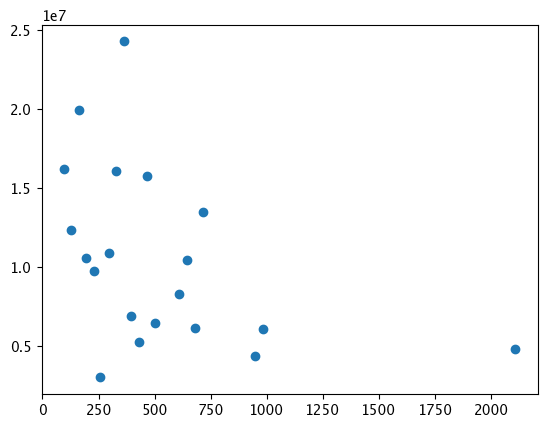

In [73]:
plt.scatter(c,d)

In [26]:
def get_difs(arr):
    a = np.abs(arr)
    out = []
    for i in range(len(arr) - 1):
        out.append(a[i+1]-a[i])
    return np.array(out)

def filter_median_and_max(old_x,old_y):
    # Filter frequencies 0-5000
    l = -1
    r = -1
    for i in range(len(old_x)):
        if old_x[i] >= 0 and l == -1:
            l = i
        if old_x[i] > 5000 and r == -1:
            r = i
    # # Filter above median
    # x = old_x[l:r]
    # y = old_y[l:r]
    # med = np.median(y)
    # out_x = []
    # out_y = []
    # for i in range(len(x)):
    #     if y[i] >= med:
    #         out_x.append(x[i])
    #         out_y.append(y[i])
    # x = out_x
    # y = out_y
    # Filter local maxima
    out_x = []
    out_y = []
    for i in range(1,len(x)-1):
        if y[i] > y[i-1] and y[i] > y[i+1]:
            out_x.append(x[i])
            out_y.append(y[i])
    return  np.array(out_x), np.array(out_y)

In [21]:
# Gets the difference between each vector in stft
np.abs(stft_arr)[5]

array([ 7258.        , 27931.97388843, 22137.0074522 , ...,
       31595.0108753 , 22137.0074522 , 27931.97388843])

In [22]:
x.shape

(14400,)

In [23]:
fft_arr.shape

(1, 144000)

In [24]:
tx, ty = filter_median_and_max(x_fft,np.ravel(np.abs(fft_arr)))

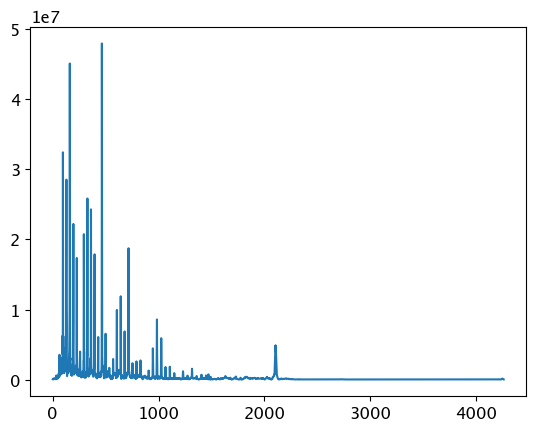

In [34]:
plt.plot(tx,ty)

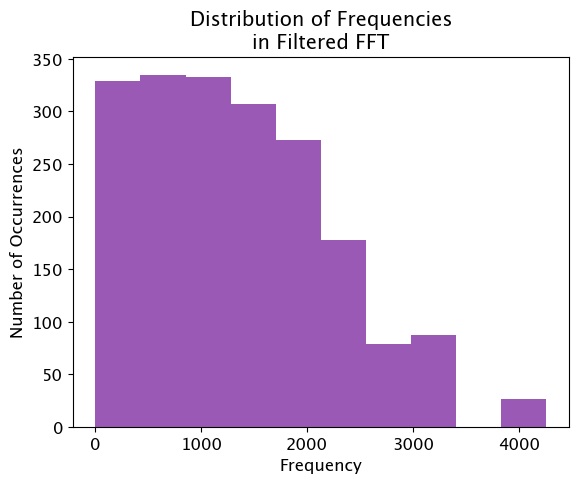

In [30]:
plt.hist(tx,bins=10,color='#9b59b6')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Frequencies\nin Filtered FFT')
plt.savefig('hist')

In [26]:
ty.shape

(1947,)

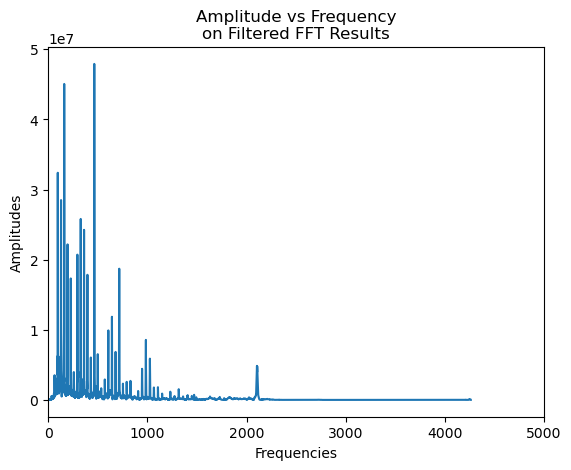

In [7]:
plt.plot(tx,ty)
plt.xlim(0,5000)
plt.xlabel('Frequencies')
plt.ylabel('Amplitudes')
plt.title('Amplitude vs Frequency\non Filtered FFT Results')
plt.savefig('FFT filter')

(0.0, 5000.0)

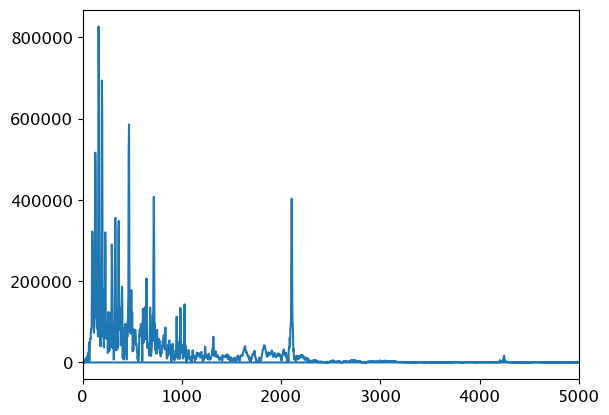

In [12]:
difs = get_difs(stft_arr)

plt.plot(x, np.abs(np.mean(difs,axis=0)))
plt.xlim(0,5000)

In [28]:
# np.save('tx',tx)
# np.save('ty',ty)


In [4]:
tx = np.load('tx.npy')
ty = np.load('ty.npy')

In [21]:
y.shape

(11,)

array([1.00000000e+00, 4.26966667e+02, 8.52933333e+02, 1.27890000e+03,
       1.70486667e+03, 2.13083333e+03, 2.55680000e+03, 2.98276667e+03,
       3.40873333e+03, 3.83470000e+03, 4.26066667e+03])

In [25]:
x, y = np.histogram(tx,bins=100)
freq_test = np.row_stack((x,y[:-1])).T

In [4]:

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [30]:
difs = np.load('fft_arr.npy')

x = np.load('x_fft.npy')

In [31]:
d_a = np.mean(difs,axis=0)

In [6]:
ty.shape

(1947,)

In [35]:
# arr = np.row_stack((x[l:r],np.abs(d_a[l:r])))
# arr.shape

(2, 15000)

In [8]:
# plt.plot(x[l:r],d_a[l:r])
arr = np.column_stack((tx,ty))
arr.shape

(1947, 2)

In [14]:
np.sum([1 if i < 2e7 else 0 for i in ty])

1938

In [27]:
import numpy as np
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full',random_state=1).fit(freq_test)
mus = gmm.means_
covs = gmm.covariances_

C:\Users\vamsi\anaconda3\envs\aml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
mus

array([[3.06762324e+01, 1.36351213e+03],
       [1.18368323e+00, 3.32689424e+03]])

In [55]:
covs
sigmas = covs[:,0,0]
sigmas

array([673080.42262998,  89334.21200382])

C:\Users\vamsi\anaconda3\envs\aml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vamsi\anaconda3\envs\aml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[4.10000000e+01 1.00000000e+00]
 [3.80000000e+01 4.35966667e+01]
 [3.30000000e+01 8.61933333e+01]
 [3.00000000e+01 1.28790000e+02]
 [3.10000000e+01 1.71386667e+02]
 [3.20000000e+01 2.13983333e+02]
 [3.20000000e+01 2.56580000e+02]
 [3.20000000e+01 2.99176667e+02]
 [3.40000000e+01 3.41773333e+02]
 [2.60000000e+01 3.84370000e+02]
 [2.90000000e+01 4.26966667e+02]
 [3.10000000e+01 4.69563333e+02]
 [3.70000000e+01 5.12160000e+02]
 [3.80000000e+01 5.54756667e+02]
 [3.40000000e+01 5.97353333e+02]
 [3.40000000e+01 6.39950000e+02]
 [3.20000000e+01 6.82546667e+02]
 [3.50000000e+01 7.25143333e+02]
 [3.80000000e+01 7.67740000e+02]
 [2.70000000e+01 8.10336667e+02]
 [3.50000000e+01 8.52933333e+02]
 [3.40000000e+01 8.95530000e+02]
 [3.00000000e+01 9.38126667e+02]
 [3.00000000e+01 9.80723333e+02]
 [3.40000000e+01 1.02332000e+03]
 [3.80000000e+01 1.06591667e+03]
 [3.40000000e+01 1.10851333e+03]
 [3.40000000e+01 1.15111000e+03]
 [3.00000000e+01 1.19370667e+03]
 [3.40000000e+01 1.23630333e+03]
 [3.400000

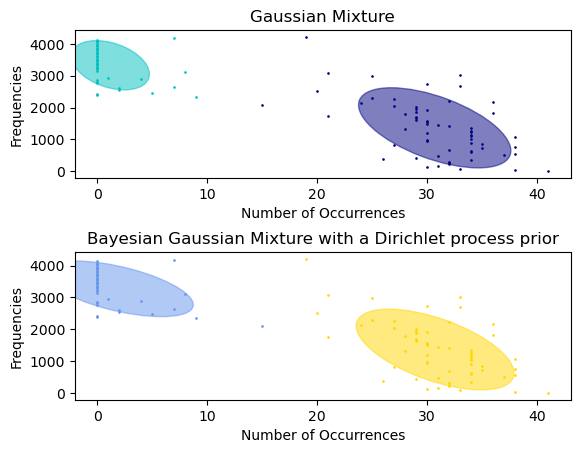

In [54]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0],X[Y_ == i, 1], 0.8, color=color)
        print(X[Y_ == i, :])
        print(Y_)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    plt.title(title)
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Frequencies')
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    plt.savefig('GMM')


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = freq_test

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=2, covariance_type="full").fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
print(dpgmm.means_)

C:\Users\vamsi\anaconda3\envs\aml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


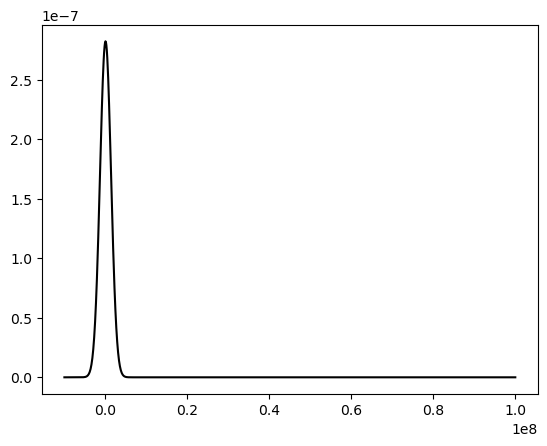

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(1)

mus =  mus[:,0]
sigmas = covs[0]
gmm = GaussianMixture(2)
gmm.means_ = mus
gmm.covars_ = sigmas
gmm.weights_ = np.array([0.5, 0.5])

#Fit the GMM with random data from the correspondent gaussians
gaus_samples_1 = np.random.normal(mus[0], sigmas[0], 10).reshape(10,1)
gaus_samples_2 = np.random.normal(mus[1], sigmas[1], 10).reshape(10,1)
fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
gmm.fit(fit_samples)

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-1e7, 1e8, 1000).reshape(1000,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()

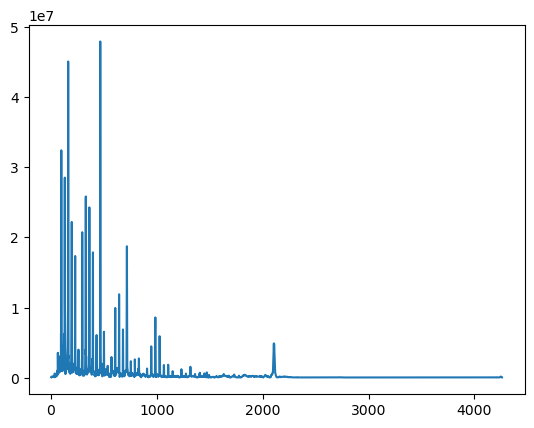

In [10]:
plt.plot(tx,ty)

(0.0, 5000.0)

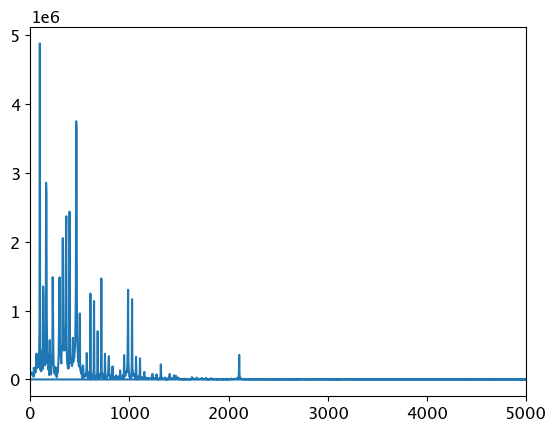

In [21]:
stft_arr.shape
plt.plot(x,np.abs(stft_arr[4]))
plt.xlim(0,5000)

In [36]:
stft_arr[1]-stft_arr[0]

array([ 1.35530000e+04+0.00000000e+00j, -7.64573307e+03+7.49766130e+03j,
       -1.28200234e+03+4.13901905e+03j, -7.96299782e+02+1.20235714e+03j,
        2.48925999e+01+1.73477602e+03j, -2.68515100e+02+8.70181045e+02j,
       -5.87690964e+02+8.82764996e+02j,  6.23876487e+01+8.47086948e+02j,
       -1.15657918e+02+5.75684470e+02j, -4.35107106e+02+5.46070009e+02j,
       -4.22891774e+02+4.85221086e+02j, -8.43114376e+01+5.80845312e+02j,
       -3.03327044e+01+2.76339746e+01j, -6.73215858e+01+4.97884719e+02j,
       -1.09447455e+02+4.11050439e+02j, -3.48517503e+01+3.23096757e+02j,
       -1.71854322e+02+3.57744709e+02j, -1.11942287e+02+3.20899052e+02j,
       -1.93597980e+02+3.19676190e+02j, -1.03356027e+01+3.54988282e+02j,
       -1.39811015e+02+1.91531176e+02j, -1.02290968e+02+2.94765132e+02j,
       -9.56450482e+01+2.84970685e+02j, -1.78494731e+02+1.97184979e+02j,
       -9.90000000e+01+2.06114046e+02j, -1.06083746e+02+2.35805159e+02j,
       -2.54425002e+01+2.50010120e+02j, -1.56484995

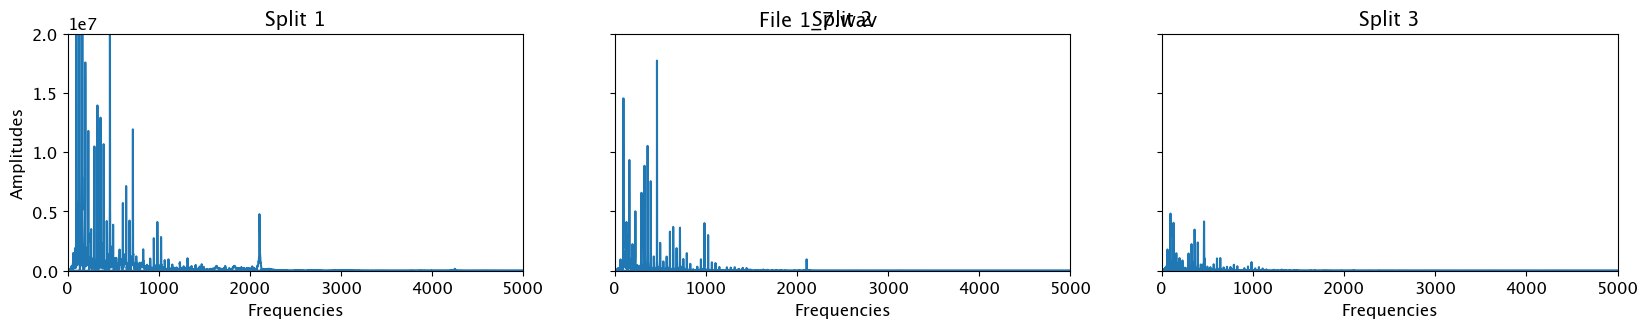

In [39]:
test.plot(0,5000,'1_7',3,3)

In [9]:
stft_arr = np.array(stft_arr)
stft_arr.shape

/var/folders/ks/zwy_9sbs4015bptyt10yyvbc0000gn/T/ipykernel_78860/776183535.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stft_arr = np.array(stft_arr)


(2,)

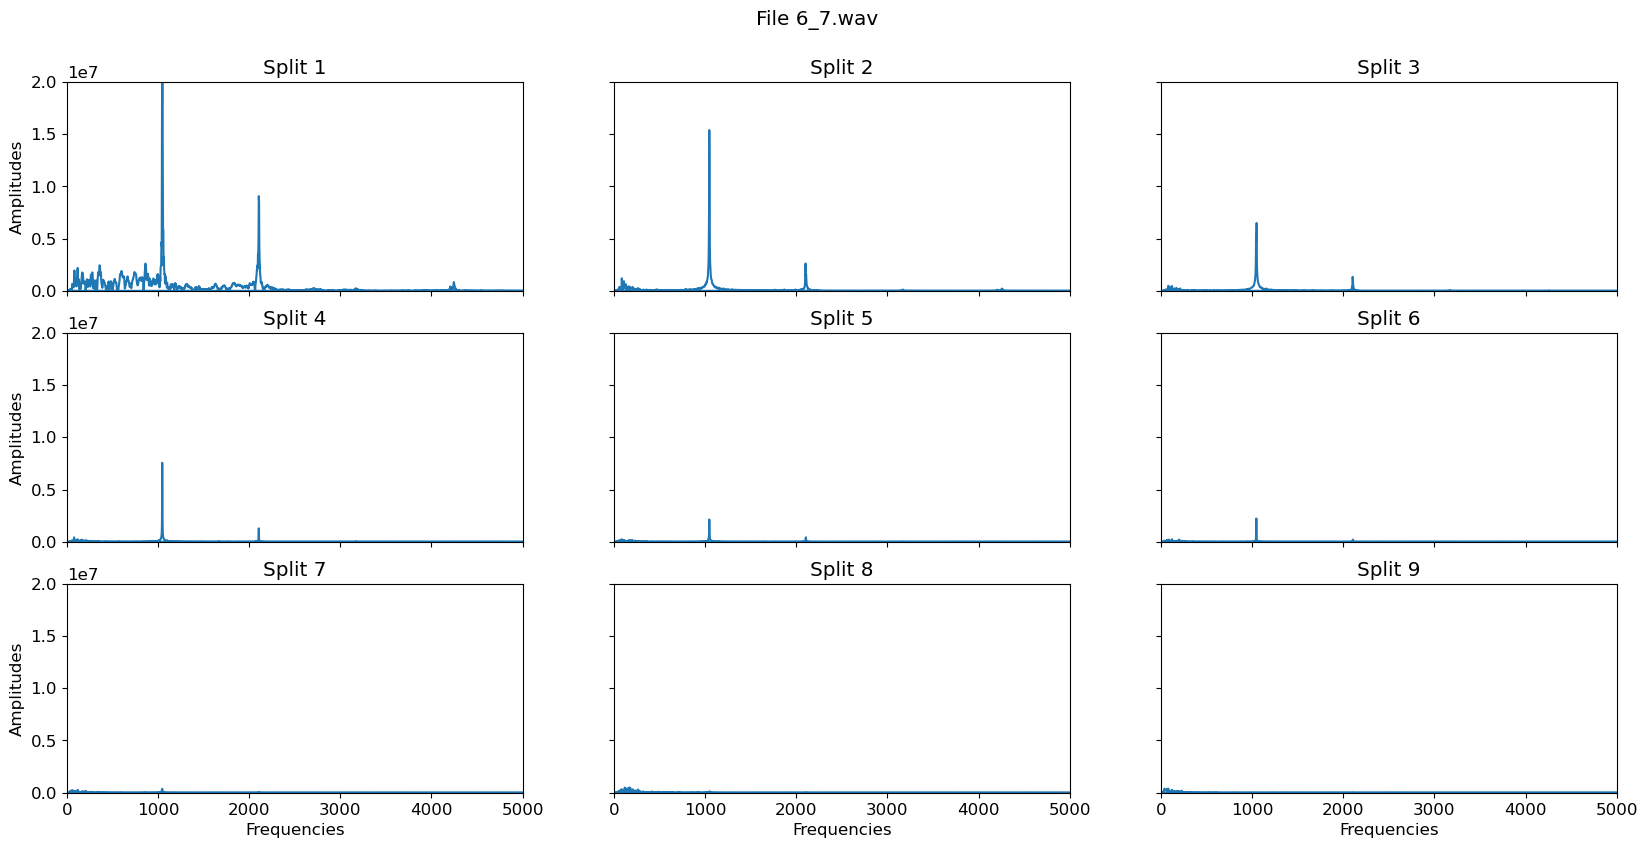

In [185]:
# Create an object with the path file
test = Analyzer('6_7.wav')

# Plot graph for an stft with a left limit, right limit, and number of splits
test.plot(0,5000,'6_7',9,3)


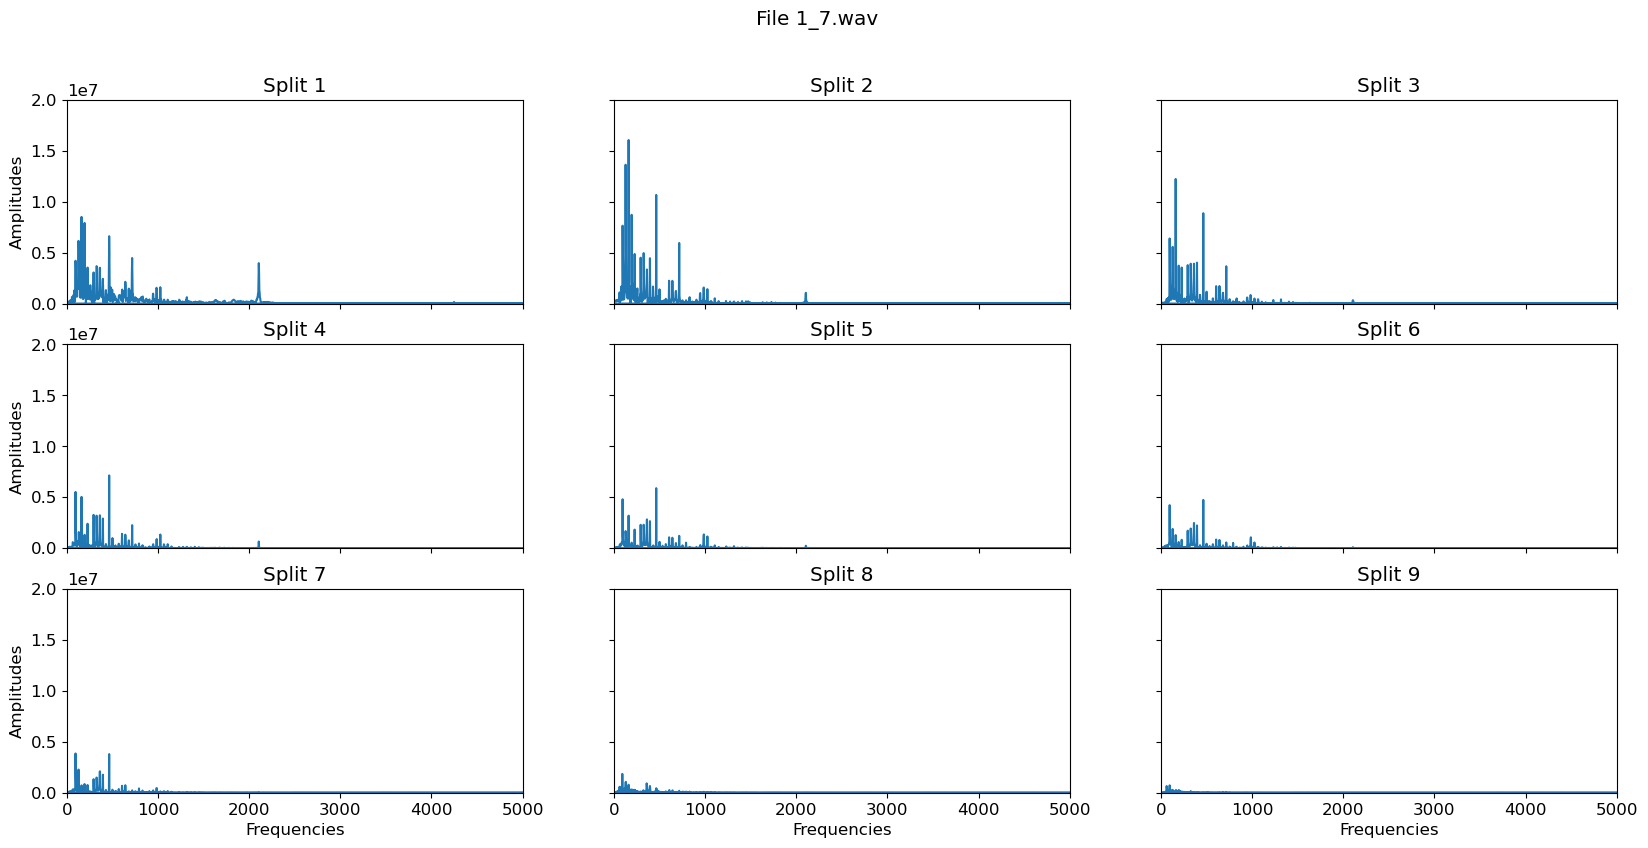

In [170]:
# Create an object with the path file
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7',9,3)

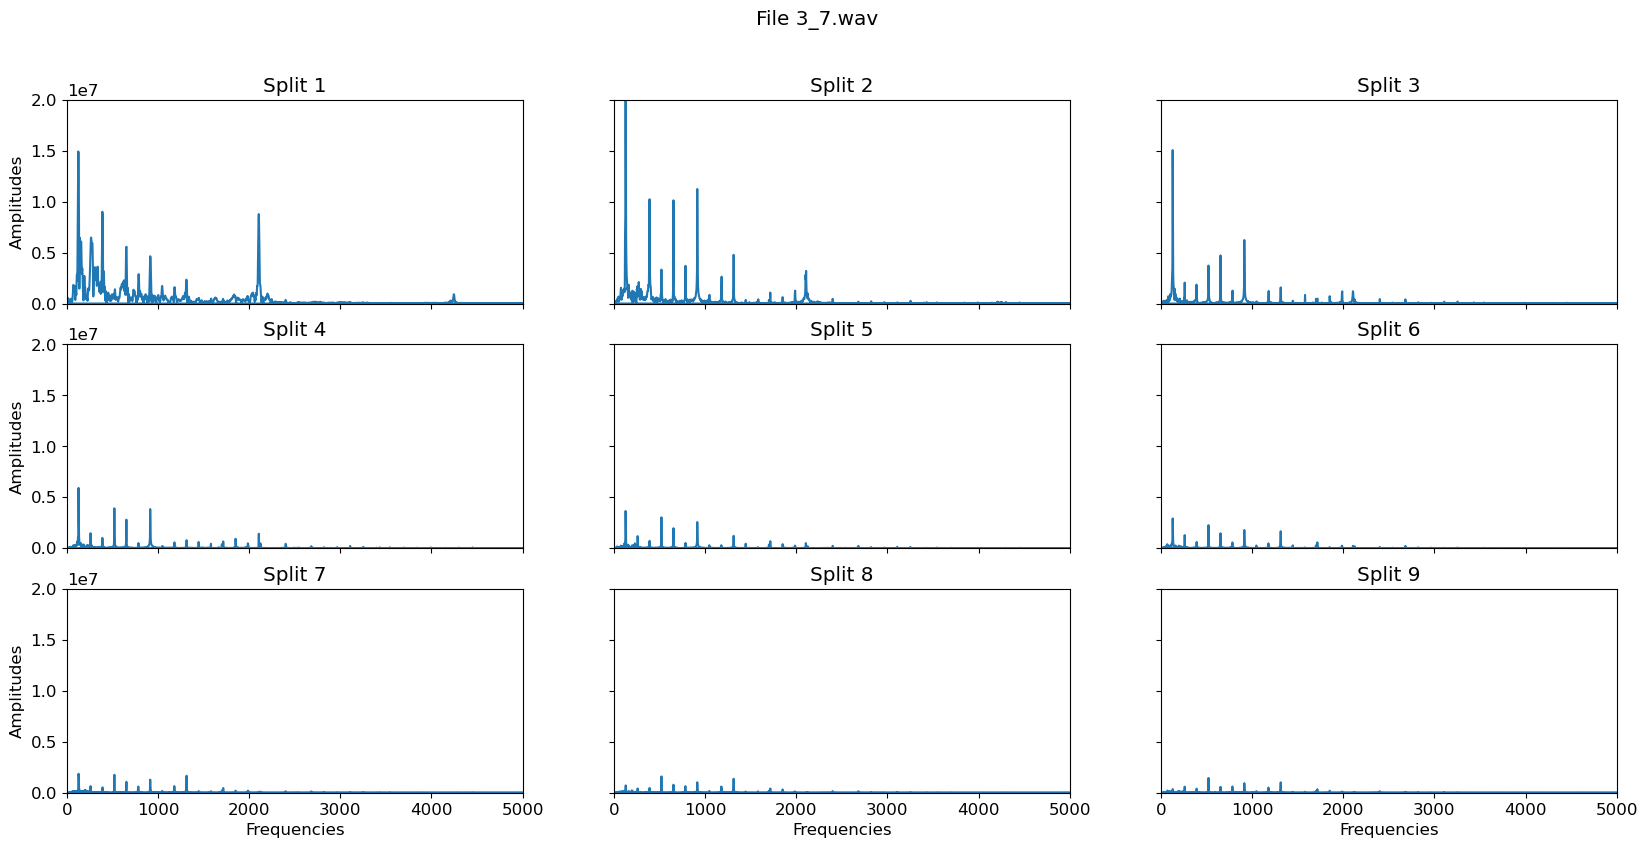

In [171]:
test = Analyzer('3_7.wav')
test.plot(0,5000,'3_7',9,3)

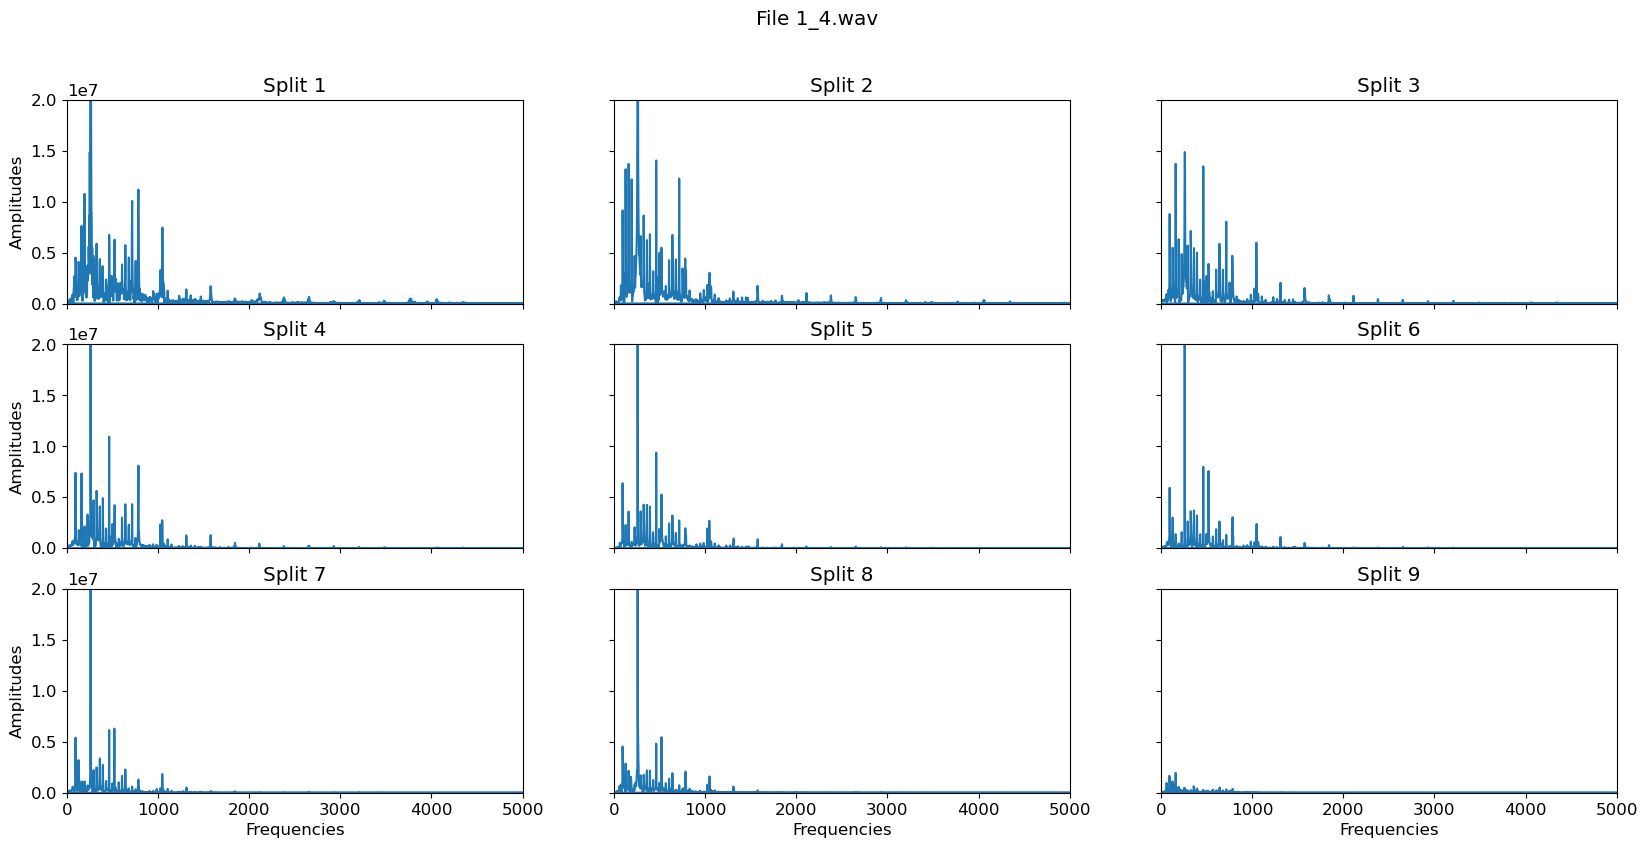

In [172]:
test = Analyzer('1_4.wav')
test.plot(0,5000,'1_4',9,3)

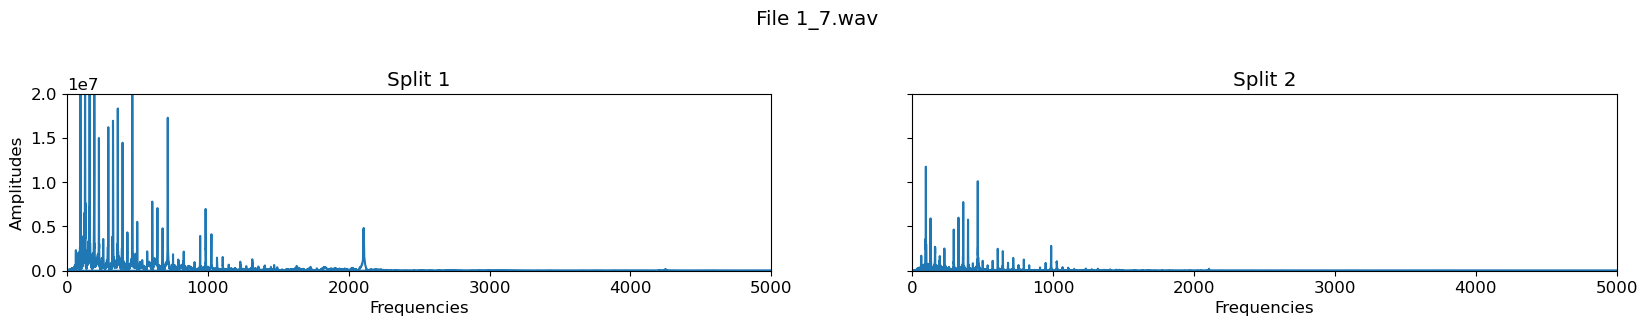

In [194]:
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7_2_split',2,1,0.7)

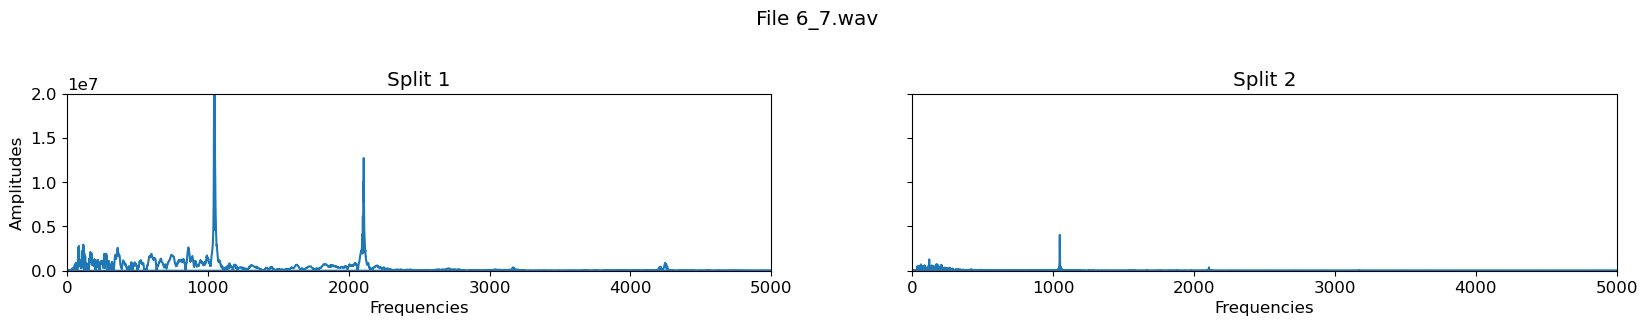

In [195]:
test = Analyzer('6_7.wav')
test.plot(0, 5000, '6_7_2_split', 2, 1,0.7)

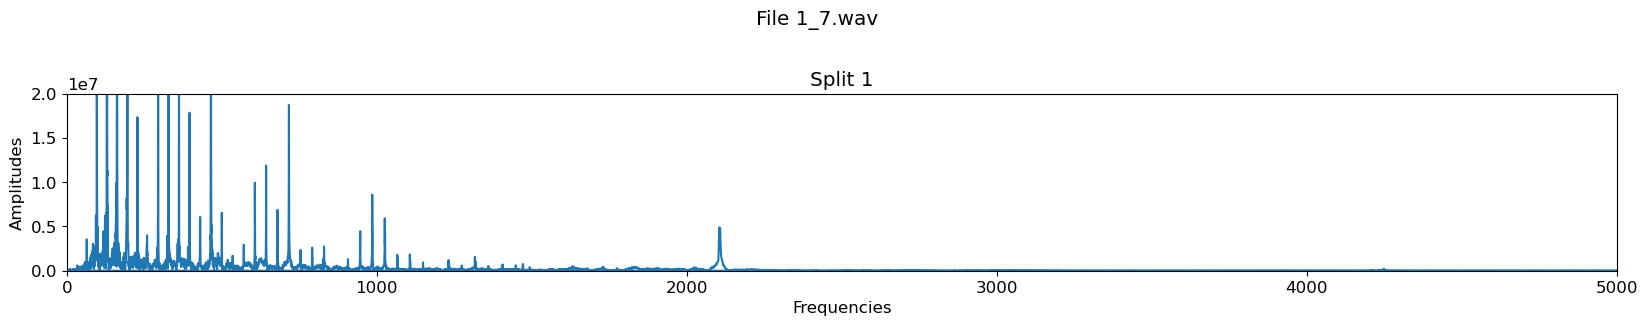

In [201]:
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7_fft',1,1,0.7)

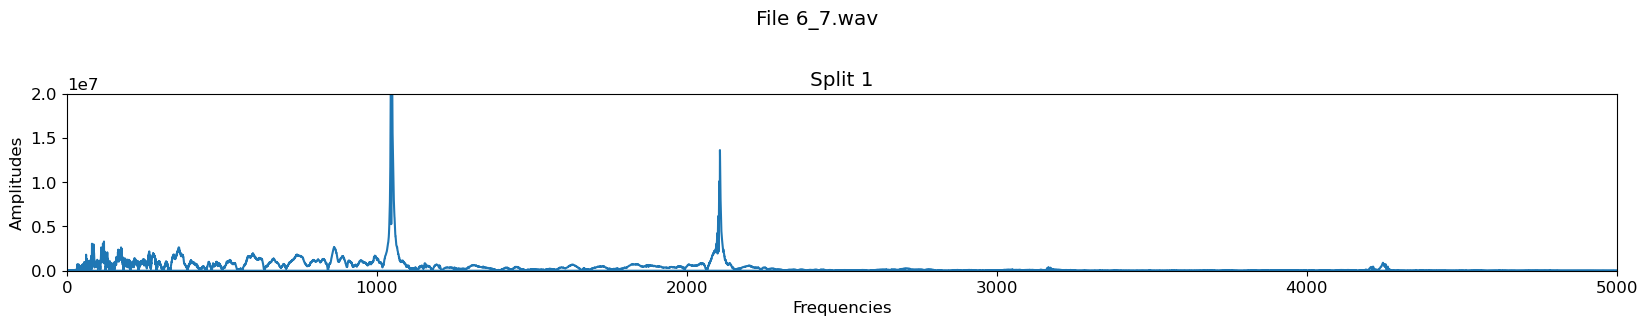

In [202]:
test = Analyzer('6_7.wav')
test.plot(0,5000,'6_7_fft',1,1,0.7)